In [1]:
import os
os.chdir("F:/iAnalyst/Data Visualization")

In [2]:
import numpy as np             
import pandas as pd             
import matplotlib.pyplot as plt
%matplotlib inline


In [3]:
df= pd.read_csv("Test_data.csv")
data=df.copy()

In [4]:
data.head()

,year,country.name,life.expectancy,fertility.rate,population,GDP.per.capita.Current.USD,region.value,incomeLevel.value
0,1997,Andorra,NaN,NaN,64147.0,18405.320100,Europe & Central Asia,High income
1,1976,Andorra,NaN,NaN,31781.0,7151.570481,Europe & Central Asia,High income
2,1984,Andorra,NaN,NaN,42704.0,7729.324115,Europe & Central Asia,High income
3,2003,Andorra,NaN,NaN,74783.0,31742.992580,Europe & Central Asia,High income
4,1970,Andorra,NaN,NaN,24279.0,3238.091462,Europe & Central Asia,High income


In [5]:
#data.tail()

In [6]:
data.count()

year                          11321
country.name                  11321
life.expectancy                9853
fertility.rate                 9874
population                    11048
GDP.per.capita.Current.USD     8233
region.value                  11321
incomeLevel.value             11321
dtype: int64

# 1.	Summarise ‘incomeLevel’ column from the dataset and      represent using proper chart.
    
        a.	Use counts
        b.	Use percentages


In [7]:
data['incomeLevel.value'].describe()

count           11321
unique              4
top       High income
freq             4104
Name: incomeLevel.value, dtype: object

In [8]:
set(data['incomeLevel.value'])

{'High income', 'Low income', 'Lower middle income', 'Upper middle income'}

In [9]:
data['incomeLevel.value'].isnull().sum()  #checking for missing values

0

In [10]:
# creating bool series True for NaN values 
bool_series = pd.isnull(data['incomeLevel.value'])

# filtering data 
# displaying data only with incomeLevel = NaN 
data[bool_series]

,year,country.name,life.expectancy,fertility.rate,population,GDP.per.capita.Current.USD,region.value,incomeLevel.value


-------------- There are no missing values in incomeLevel.value

High income            4104
Upper middle income    2999
Lower middle income    2565
Low income             1653
Name: incomeLevel.value, dtype: int64


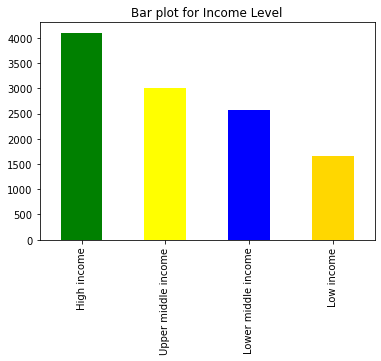

In [11]:
var=data['incomeLevel.value'].value_counts()
print(var)
var.plot.bar(title='Bar plot for Income Level',color=['green','yellow','blue','gold'])

### When counts, use bar graphs and when percentages use pie chart

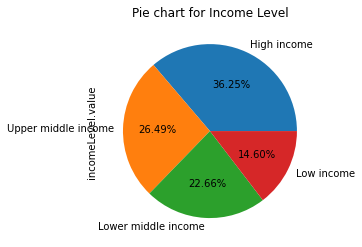

In [12]:
var.plot.pie(title='Pie chart for Income Level',legend=False,autopct='%1.2f%%')  #autopct for including percentages

Majority of countries over the years have high income level followed by upper middle level income & lower middle income. The low income countries are low in percentage 

# 2.	Summarise ‘incomeLevel’ and ‘region’ columns together and represent the summary by proper chart.
        a.	Use counts
        b.	Use ‘region’ wise percentages


In [13]:
data1 = data.iloc[:,6:8]
data1

,region.value,incomeLevel.value
0,Europe & Central Asia,High income
1,Europe & Central Asia,High income
2,Europe & Central Asia,High income
3,Europe & Central Asia,High income
4,Europe & Central Asia,High income
...,...,...
11316,Sub-Saharan Africa,Upper middle income
11317,Sub-Saharan Africa,Upper middle income
11318,Sub-Saharan Africa,Upper middle income
11319,Sub-Saharan Africa,Upper middle income


In [14]:
data1.describe()

,region.value,incomeLevel.value
count,11321,11321
unique,7,4
top,Europe & Central Asia,High income
freq,3056,4104


Europe & Central Asia         3056
Sub-Saharan Africa            2565
Latin America & Caribbean     2166
East Asia & Pacific           1938
Middle East & North Africa    1026
South Asia                     456
North America                  114
Name: region.value, dtype: int64


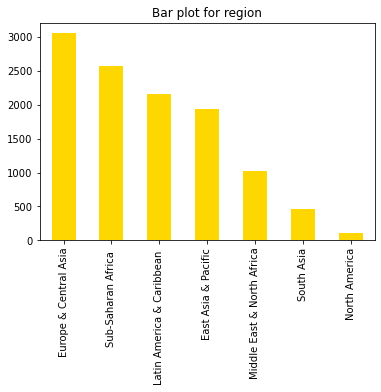

In [15]:

var2=data1['region.value'].value_counts()
print(var2)
var2.plot.bar(title='Bar plot for region',color=['gold'])


In [16]:
#another method

In [17]:
t1=pd.crosstab(data['region.value'],data['incomeLevel.value'])
t1

incomeLevel.value,High income,Low income,Lower middle income,Upper middle income
region.value,,,,
East Asia & Pacific,741,57,741,399
Europe & Central Asia,2052,0,285,719
Latin America & Caribbean,741,57,285,1083
Middle East & North Africa,399,0,285,342
North America,114,0,0,0
South Asia,0,114,285,57
Sub-Saharan Africa,57,1425,684,399


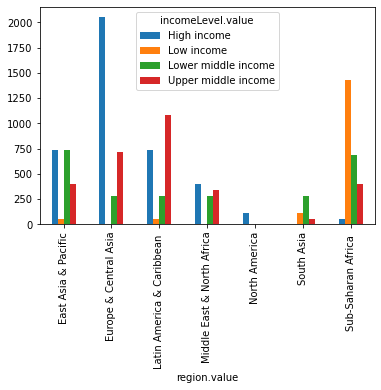

In [51]:
#t1.plot(kind='bar')
t1.plot.bar()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000018FCFBDB1C0>,
      dtype=object)

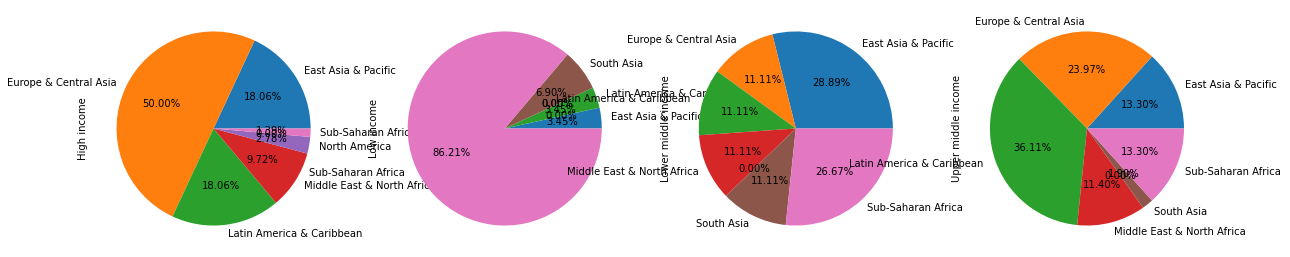

In [19]:
t1.plot(kind='pie',subplots=True,figsize=(20,10),legend=False,autopct='%1.2f%%')

In [20]:
## seaborn code is working but not correct as it does not give combined counts
# thus code using matplotlib is correct
'''import seaborn as sns
with sns.axes_style('white'):
    g = sns.factorplot("region.value", data=data, aspect=4.0, kind='count'
                       )   #hue : (optional)This parameter take column name for colour encoding
                                                                #aspect : (optional) This parameter take float value, Aspect ratio of each facet, so that aspect * height gives the width of each facet in inches
    g.set_ylabels('frequency')
    
    
import seaborn as sns
with sns.axes_style('white'):
    g = sns.factorplot("incomeLevel.value", data=data, aspect=4.0, kind='count'
                       )   #hue : (optional)This parameter take column name for colour encoding
                                                                #aspect : (optional) This parameter take float value, Aspect ratio of each facet, so that aspect * height gives the width of each facet in inches
    g.set_ylabels('frequency')
'''

'import seaborn as sns\nwith sns.axes_style(\'white\'):\n    g = sns.factorplot("region.value", data=data, aspect=4.0, kind=\'count\'\n                       )   #hue : (optional)This parameter take column name for colour encoding\n                                                                #aspect : (optional) This parameter take float value, Aspect ratio of each facet, so that aspect * height gives the width of each facet in inches\n    g.set_ylabels(\'frequency\')\n    \n    \nimport seaborn as sns\nwith sns.axes_style(\'white\'):\n    g = sns.factorplot("incomeLevel.value", data=data, aspect=4.0, kind=\'count\'\n                       )   #hue : (optional)This parameter take column name for colour encoding\n                                                                #aspect : (optional) This parameter take float value, Aspect ratio of each facet, so that aspect * height gives the width of each facet in inches\n    g.set_ylabels(\'frequency\')\n'

# 3.	Find summary of data representing column-wise missing cases and represent the same by appropriate chart.

In [21]:
nullval= data.isna().sum()  #sum of all the null values in the data
nullval

year                             0
country.name                     0
life.expectancy               1468
fertility.rate                1447
population                     273
GDP.per.capita.Current.USD    3088
region.value                     0
incomeLevel.value                0
dtype: int64

In [ ]:
nullval.plot.bar()   #for barplot

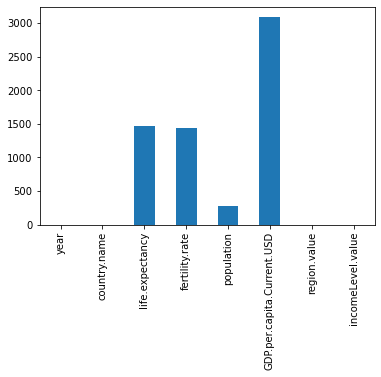

In [49]:
#for line graph
fig, axes = plt.subplots(figsize=(14,7))

axes.plot(nullval.index, nullval.values, 'g-')
axes.set_xlabel('name')
axes.set_ylabel('values')
axes.set_title('missing values')


This means there is no null values for year, country name,region value and incomeLevel value and others have missing values 

# 4.	Find mean of ‘life.expectancy’ for Japan, India, China, Cuba and Denmark. Represent this data using Barplot.

In [23]:
data['country.name'].unique()

array(['Andorra', 'Afghanistan', 'Antigua and Barbuda', 'Albania',
       'Armenia', 'Angola', 'Argentina', 'American Samoa', 'Austria',
       'Australia', 'Aruba', 'Azerbaijan', 'Bosnia and Herzegovina',
       'Barbados', 'Bangladesh', 'Belgium', 'Burkina Faso', 'Bulgaria',
       'Bahrain', 'Burundi', 'Benin', 'Bermuda', 'Brunei Darussalam',
       'Bolivia', 'Brazil', 'Bahamas, The', 'Bhutan', 'Botswana',
       'Belarus', 'Belize', 'Canada', 'Congo, Dem. Rep.',
       'Central African Republic', 'Congo, Rep.', 'Switzerland',
       "Cote d'Ivoire", 'Chile', 'Cameroon', 'China', 'Colombia',
       'Costa Rica', 'Cuba', 'Cabo Verde', 'Curacao', 'Cyprus',
       'Czech Republic', 'Germany', 'Djibouti', 'Denmark', 'Dominica',
       'Dominican Republic', 'Algeria', 'Ecuador', 'Estonia',
       'Egypt, Arab Rep.', 'Eritrea', 'Spain', 'Ethiopia', 'Finland',
       'Fiji', 'Micronesia, Fed. Sts.', 'Faroe Islands', 'France',
       'Gabon', 'Grenada', 'Georgia', 'Ghana', 'Gibraltar', 'Gr

<BarContainer object of 5 artists>

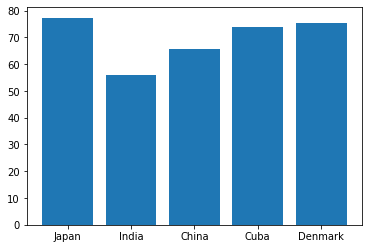

In [54]:
#Easy method
country='Japan India China Cuba Denmark'.split()
data_groupby= data.groupby('country.name').mean()['life.expectancy'][country]
#data_groupby
plt.bar(height= data_groupby.values, x=data_groupby.index)

#Different method

In [25]:
country='Japan India China Cuba Denmark'.split()
country
l=[]
for i in country:
    l.append(data[data['country.name']==i])  #appending for each country. Here l[0] will be for japan, l[1] will be for india and so on
data1= pd.concat(l[0:])   #concatenating for all the countries i.e. l[0 to 4]
data1.head()

,year,country.name,life.expectancy,fertility.rate,population,GDP.per.capita.Current.USD,region.value,incomeLevel.value
5358,1982,Japan,76.922927,1.77,118449000.0,9428.874650,East Asia & Pacific,High income
5359,2012,Japan,83.096098,1.41,127561489.0,46701.008000,East Asia & Pacific,High income
5360,1966,Japan,70.986585,1.58,99790000.0,1058.503561,East Asia & Pacific,High income
5361,1961,Japan,68.310000,2.05,94943000.0,563.586760,East Asia & Pacific,High income
5362,1976,Japan,75.456829,1.85,112771000.0,5111.295149,East Asia & Pacific,High income


In [26]:
data1_groupby= data1.groupby('country.name').mean()['life.expectancy']
data1_groupby

country.name
China      65.624512
Cuba       73.761157
Denmark    75.282856
India      56.099255
Japan      77.338235
Name: life.expectancy, dtype: float64

Text(0, 0.5, 'Life Expectancy')

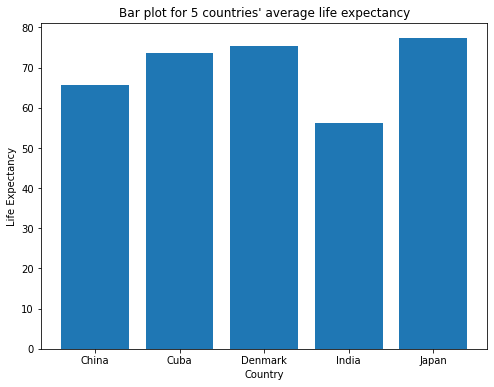

In [27]:
plt.figure(figsize=(8,6))
plt.bar(height= data1_groupby.values, x=data1_groupby.index) #y-axis=height
plt.title("Bar plot for 5 countries' average life expectancy")
plt.xlabel("Country")
plt.ylabel("Life Expectancy")

#ANother manual Method

plt.bar(list,height=list)


# 5.	Draw histogram for 
a.	life.expectancy

b.	life.expectancy of incomeLevel= High income

c.	fertility.rate of incomeLevel = Low income

d.	population of region = Europe & Central Asia


In [28]:
#data_lifeexpectancy= data.groupby('country.name').mean()['life.expectancy']
#data_lifeexpectancy

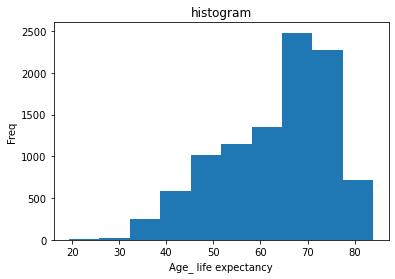

In [29]:
#1
plt.hist(data['life.expectancy'])
#plt.hist(df.YearsAtCompany) # add color='green',bins=20
plt.xlabel('Age_ life expectancy')
plt.ylabel('Freq')
plt.title('histogram')
plt.show()

#that means for eg - 2500 people lived till the age of 65-70 and 600 people lived till the age of 75-85 

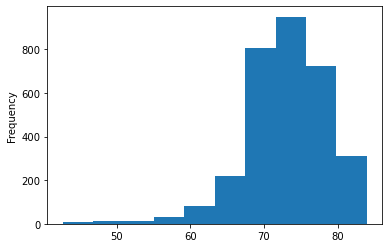

In [30]:
#2
data2= data[data['incomeLevel.value']=='High income']['life.expectancy']
data2.plot(kind='hist')

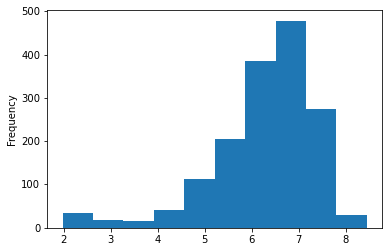

In [31]:
#3
data3= data[data['incomeLevel.value']=='Low income']['fertility.rate']
data3.plot(kind='hist')

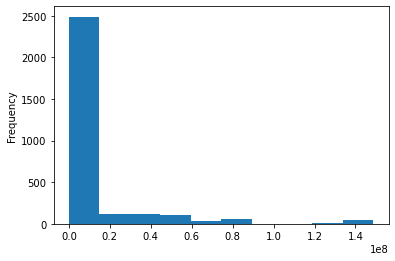

In [32]:
#4
data4= data[data['region.value']=='Europe & Central Asia']['population']
data4.plot(kind='hist')

# 6.	Draw density plot for 
a.	GDP.per.capita.Current.USD

b.	GDP.per.capita.Current.USD of country = Japan

c.	GDP.per.capita.Current.USD of region = South Asia

d.	GDP.per.capita.Current.USD of incomeLevel= High income


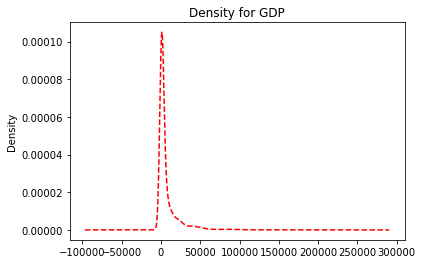

In [33]:
a=data['GDP.per.capita.Current.USD']
a.plot.kde(color='red',title='Density for GDP',linestyle='dashed')  #dashed/solid

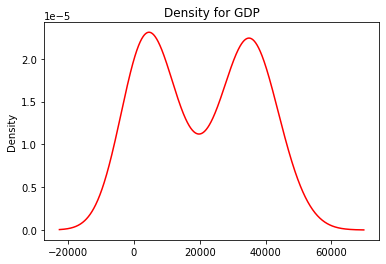

In [34]:
b=data[data['country.name']=='Japan']['GDP.per.capita.Current.USD']     
b.plot.kde(color='red',title='Density for GDP',linestyle='solid')

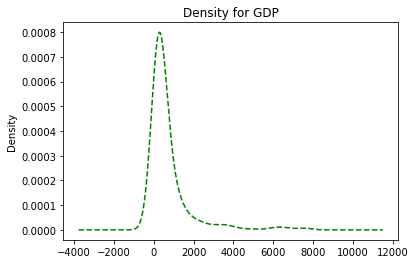

In [35]:
c=data[data['region.value']=='South Asia']['GDP.per.capita.Current.USD']     
c.plot.kde(color='green',title='Density for GDP',linestyle='dashed')

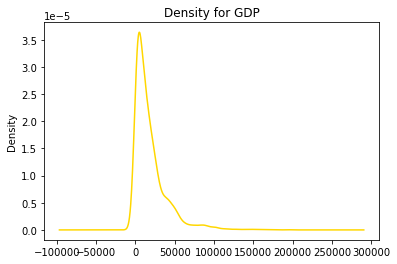

In [36]:
d=data[data['incomeLevel.value']=='High income']['GDP.per.capita.Current.USD']     
d.plot.kde(color='gold',title='Density for GDP',linestyle='solid')

# 7.	Draw boxplot for 
a.	life.expectancy of region= Sub-Saharan Africa

b.	fertility.rate of incomeLevel = Low income and High income

c.	GDP.per.capita.Current.USD of income = Upper middle income

d.	population of region = East Asia & Pacific


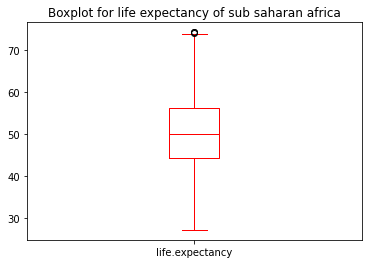

In [37]:
#try boxplot using sns

a=data[data['region.value']=='Sub-Saharan Africa ']['life.expectancy']    
a.plot.box(color='red',title='Boxplot for life expectancy of sub saharan africa')

#output is symmetric

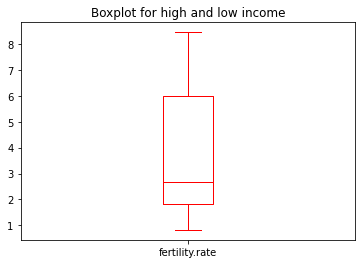

In [38]:
b1=data[data['incomeLevel.value']=='High income']['fertility.rate'] 
b2=data[data['incomeLevel.value']=='Low income']['fertility.rate'] 
b=pd.concat([b1,b2])

b.plot.box(color='red',title='Boxplot for high and low income')

#output is positively skewwed

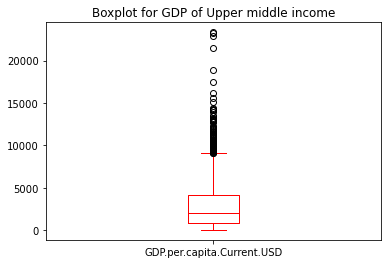

In [39]:
c=data[data['incomeLevel.value']=='Upper middle income']['GDP.per.capita.Current.USD']    
c.plot.box(color='red',title='Boxplot for GDP of Upper middle income')

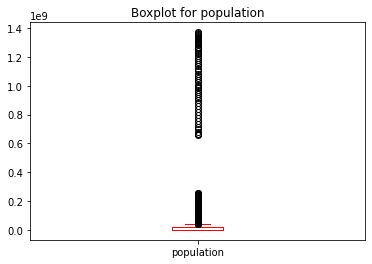

In [40]:
d=data[data['region.value']=='East Asia & Pacific']['population']    
d.plot.box(color='red',title='Boxplot for population')


#what is the interpretation of such type of boxplot

# 8.	Draw scatterplot for
a.	life.expectancy and GDP.per.capita.Current.USD

b.	life.expectancy and GDP.per.capita.Current.USD of region = Latin America & Caribbean

c.	life.expectancy and GDP.per.capita.Current.USD of income = Upper middle income

d.	fertility.rate and life.expectancy of country = India


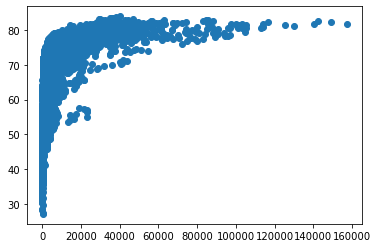

In [44]:
a1=data['GDP.per.capita.Current.USD']#=='High income']['fertility.rate'] 
a2=data['life.expectancy']#=='Low income']['fertility.rate'] 

#b=pd.DataFrame([a1,a2])
#b.plot.scatter(x='gdp',y='life',color='lightcoral',title='Scatter plot for GDP and life')

plt.scatter(a1,a2)

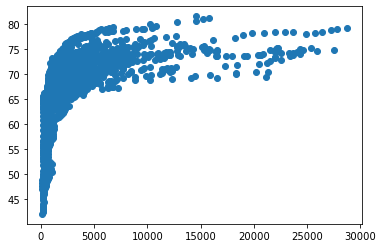

In [43]:
b1=data[data['region.value']=='Latin America & Caribbean ']
b= b1['GDP.per.capita.Current.USD']
c= b1['life.expectancy']


plt.scatter(b,c)
#try sns.scatter(b,c) by importing seaborn

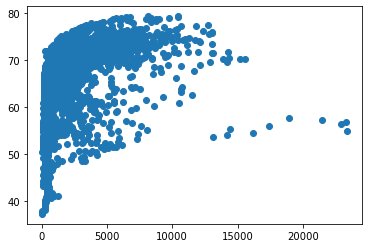

In [52]:
b1=data[data['incomeLevel.value']=='Upper middle income']
b= b1['GDP.per.capita.Current.USD']
c= b1['life.expectancy']


plt.scatter(b,c)

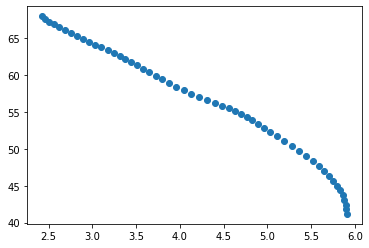

In [50]:
b1=data[data['country.name']=='India']
b= b1['fertility.rate']
c= b1['life.expectancy']

plt.scatter(b,c)